In [2]:
import scipy
import serial
import time
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.signal as signal
from scipy.signal import find_peaks
from scipy import fftpack
from scipy.optimize import curve_fit
from scipy.stats import norm
import statistics

In [3]:
fish_number = 2
bn = 624
fn =631
ROI = 'heart'

# Sensors 

In [4]:
A1 = "20210624-143847-peixe1.csv"
A2 = "20210624-145602-peixe2.csv"
A3 = "20210624-151249-peixe3.csv"
A4 = "20210624-153033-peixe4.csv"
A5 = "20210624-155357-peixe5.csv"
data=pd.read_csv(A4)
data.columns = ['Tempo','Amplitude', 'Temperatura']

print(data)
begin= int(bn/0.05)- int(10.92/0.05) 
finish = int(fn/0.05)- int(10.92/0.05)

        Tempo  Amplitude  Temperatura
0       10.15        574        22.49
1       10.20       2395        21.89
2       10.25        448        22.39
3       10.30       3963        22.29
4       10.35          0        22.59
...       ...        ...          ...
16696  844.82       1597        22.49
16697  844.87       1573        22.39
16698  844.92       1568        22.49
16699  844.97       1548        22.59
16700  845.02       1561        22.39

[16701 rows x 3 columns]


In [5]:
N  = 2                 # Filter order
Wn = [0.01, 0.4]       # Cutoff frequency
B, A = signal.butter(N, Wn,'bandpass', output='ba')
smooth_data = signal.filtfilt(B,A, data['Amplitude'][begin:finish])

In [6]:
smooth_data = smooth_data/max(smooth_data)
peaks, _ = find_peaks(smooth_data, height = 0.4, distance = 7, threshold = 0.00001) #retorna os indices dos picos 
print(len(peaks))

10


In [7]:
#tempos dos picos
tt = list(data['Tempo'][begin:finish])
td = []
for m in range(len(peaks)):
    u = peaks[m]
    td.append(tt[u])
print(td)

[623.32, 623.97, 624.32, 625.22, 625.57, 625.92, 626.52, 626.87, 628.72, 629.82]


# Video 

In [8]:
f = open("Mean-peixe4-624-631.txt", "r")
s= f.read()
# print(s)
avg = list(s.split('\n'))
frame = []
time = []
video_dur = fn-bn
nr_frames= len(avg)-1

a = video_dur/nr_frames
fps = 30 #freq de amostragem 30Hz

for n in range(1,nr_frames+1):
    frame.append(n)
    time.append(a*n + bn)
    avg[n-1] = float(avg[n-1])

avg =np.array(avg[:-1])

m = avg[:]
t= time[:]

FileNotFoundError: [Errno 2] No such file or directory: 'Mean-peixe4-624-631.txt'

In [136]:
N1  = 2                 # Filter order
Wn1 = [0.02, 0.2]       # Cutoff frequency
B1, A1 = signal.butter(N1, Wn1,'bandpass', output='ba')
smooth_data1 = signal.filtfilt(B1,A1, m)


In [137]:
peaks1, _ = find_peaks(smooth_data1, height =0, distance = 10, threshold = 0.0001) #retorna os indices dos picos 
print(len(peaks1))

31


In [138]:
td1 = []
for m in range(len(peaks1)):
    u = peaks1[m]
    td1.append(t[u])
print(td1)

[454.42935779816514, 455.2880733944954, 455.8165137614679, 456.4770642201835, 457.23669724770645, 457.79816513761466, 458.29357798165137, 458.7889908256881, 459.4825688073395, 459.81284403669724, 460.2422018348624, 460.77064220183485, 461.3321100917431, 461.72844036697245, 462.22385321100916, 462.851376146789, 463.37981651376145, 463.77614678899084, 464.6348623853211, 465.5596330275229, 466.68256880733946, 467.31009174311924, 467.6733944954128, 468.30091743119266, 468.7302752293578, 469.5229357798165, 469.8532110091743, 470.31559633027524, 471.07522935779815, 471.405504587156, 471.86788990825687]


<IPython.core.display.Javascript object>


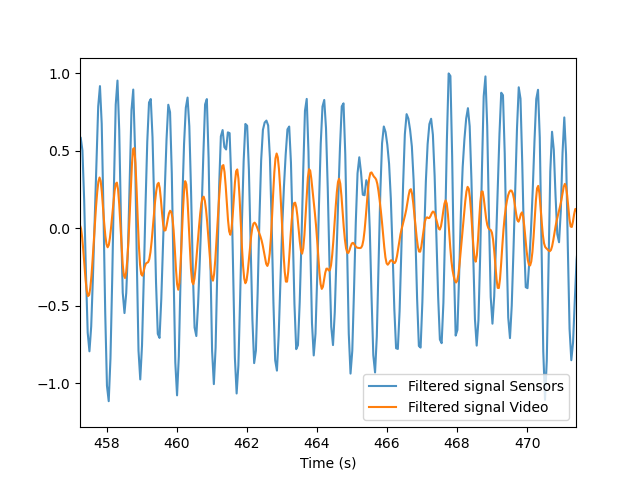

In [140]:
plt.plot(data['Tempo'][begin:finish],smooth_data,'k-', color = 'C0', label='Filtered signal Sensors', alpha = 0.8)
plt.plot(t,smooth_data1,'-',color = 'C1', label='Filtered signal Video', alpha = 1)
plt.legend(loc = 'best')
plt.xlabel('Time (s)')
plt.show()

<IPython.core.display.Javascript object>


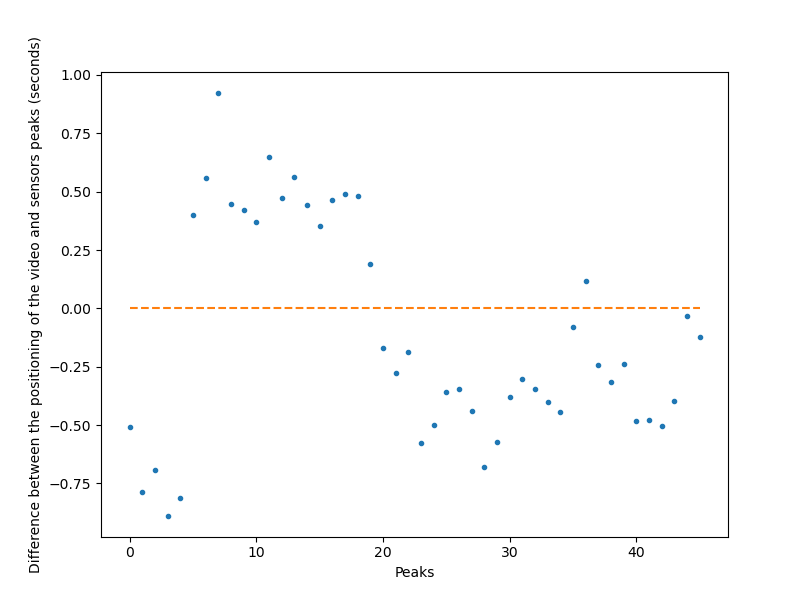

Text(0, 0.5, 'Difference between the positioning of the video and sensors peaks (seconds)')

In [124]:
dif = []
for p in range(len(td1)):
    dif.append(td1[p]-td[p])
    
plt.plot(dif,'.', color="C0")
plt.plot(np.zeros_like(dif), "--", color="C1")
plt.xlabel('Peaks')
plt.ylabel('Difference between the positioning of the video and sensors peaks (seconds)')